In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

# ✅ Set up Chrome WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode (no browser UI)
driver = webdriver.Chrome(options=options)

# ✅ URL of ESPN Cricinfo IPL 2020 News
url = "https://www.espncricinfo.com/series/ipl-2020-21-1210595"
driver.get(url)
time.sleep(3)  # Let the page load

# ✅ Scraping headlines, summaries, and links
articles = driver.find_elements(By.CSS_SELECTOR, "a.ds-rounded-xl")
data = []

for article in articles:
    try:
        headline = article.find_element(By.CSS_SELECTOR, "h2.ds-text-title-s.ds-font-bold.ds-text-typo").text
        summary = article.find_element(By.CSS_SELECTOR, "p.ds-text-compact-s.ds-text-typo-mid2.ds-mt-1").text
        link = article.get_attribute("href")  # Extract the full URL
        
        if not link.startswith("https"):
            link = "https://www.espncricinfo.com" + link  # Append base URL if missing

        data.append({"Headline": headline, "Summary": summary, "Link": link})
    except Exception as e:
        print(f"❌ Skipping article due to error: {e}")

# ✅ Save to CSV
df = pd.DataFrame(data)
df.to_csv("ESPNCricinfo_IPL2020_News.csv", index=False)

print(f"✅ Scraped {len(df)} articles from ESPN Cricinfo IPL 2020 News!")
driver.quit()

✅ Scraped 0 articles from ESPN Cricinfo IPL 2020 News!


In [13]:
import os
import signal
import subprocess

# ✅ Kill any existing ChromeDriver processes
try:
    subprocess.run(["pkill", "-f", "chromedriver"], check=True)
except subprocess.CalledProcessError:
    print("No existing ChromeDriver instances found.")

# ✅ Relaunch WebDriver
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in background
driver = webdriver.Chrome(options=options)
driver.get("https://www.espncricinfo.com/series/ipl-2020-21-1210595")
print("✅ WebDriver restarted successfully!")

✅ WebDriver restarted successfully!


In [15]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get("https://www.google.com")
print(driver.title)  # Should print "Google"
driver.quit()

Google


In [19]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.headless = False  # Ensure we see the browser window

driver = webdriver.Chrome(options=options)
driver.get("https://www.google.com")
print(driver.title)
driver.quit()

Google


In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# ✅ Set up Selenium WebDriver (Non-Headless Mode)
options = webdriver.ChromeOptions()
options.headless = False  # Running with UI to avoid blocking
driver = webdriver.Chrome(options=options)

# ✅ Open ESPN Cricinfo IPL 2020 News
url = "https://www.espncricinfo.com/series/ipl-2020-21-1210595"
driver.get(url)
time.sleep(5)  # Allow the page to load fully

# ✅ Scroll down multiple times to load more content
body = driver.find_element(By.TAG_NAME, "body")
for _ in range(10):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(2)  # Allow articles to load dynamically

# ✅ Wait for the articles to appear
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "h2.ds-text-title-s.ds-font-bold.ds-text-typo")))

# ✅ Extract headlines, summaries, and links
articles = driver.find_elements(By.CSS_SELECTOR, "a.ds-rounded-xl")
data = []

for article in articles:
    try:
        headline = article.find_element(By.CSS_SELECTOR, "h2.ds-text-title-s.ds-font-bold.ds-text-typo").text
        summary = article.find_element(By.CSS_SELECTOR, "p.ds-text-compact-s.ds-text-typo-mid2.ds-mt-1").text
        link = article.get_attribute("href")

        if not link.startswith("https"):
            link = "https://www.espncricinfo.com" + link  # Ensure full URL

        data.append({"Headline": headline, "Summary": summary, "Link": link})
    except Exception as e:
        print(f"❌ Skipping article due to error: {e}")

# ✅ Save extracted data to CSV
df = pd.DataFrame(data)
df.to_csv("ESPNCricinfo_IPL2020_News.csv", index=False)

print(f"✅ Scraped {len(df)} articles from ESPN Cricinfo IPL 2020 News!")
driver.quit()

❌ Skipping article due to error: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2.ds-text-title-s.ds-font-bold.ds-text-typo"}
  (Session info: chrome=134.0.6998.88); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x0000000101281804 cxxbridge1$str$ptr + 2785964
1   chromedriver                        0x0000000101279ddc cxxbridge1$str$ptr + 2754692
2   chromedriver                        0x0000000100dcdea8 cxxbridge1$string$len + 92928
3   chromedriver                        0x0000000100e151d0 cxxbridge1$string$len + 384552
4   chromedriver                        0x0000000100e0a878 cxxbridge1$string$len + 341200
5   chromedriver                        0x0000000100e56678 cxxbridge1$string$len + 651984
6   chromedriver                        0x0000000100e0935c cxxbridge1$string$len + 335796
7   chrom

In [23]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# ✅ Set up Selenium WebDriver
options = webdriver.ChromeOptions()
options.headless = False  # Run with UI
driver = webdriver.Chrome(options=options)

# ✅ Open the Cricinfo page
url = "https://www.espncricinfo.com/series/ipl-2020-21-1210595"
driver.get(url)
time.sleep(5)  # Wait for the page to load

# ✅ Find all h2 elements and print them
h2_elements = driver.find_elements(By.TAG_NAME, "h2")
for h2 in h2_elements:
    print(h2.text)

driver.quit()

Vote for your favourite moment of IPL 2020
Overseas players' impact - England on top, WI smash it
What were the takeaways from IPL 2020?
Star Sports Cricket Connected: Which IPL team needs a restructure?
Chopra: Things that surprised me this IPL

Devdutt Padikkal: 'Virat Kohli makes your game easier and helps you build an innings'
Mumbai Indians' dominance explained
The fitting end that Mumbai's brilliance deserved
Gambhir: Kohli must put his hand up and be accountable
Gautam Gambhir: Quality Indian players make Mumbai Indians the best team
Was Ishan Kishan Mumbai's biggest surprise package?
Gambhir: India's loss if Rohit isn't white-ball captain
Rohit: 'Said at the start we want to make winning a habit'
Gambhir's tips: The best way to tackle Bumrah
Capitals: high on skill, less than the sum of their parts
Monga: The importance of Pollard and the Pandya brothers
Should Kishan and de Kock open for Mumbai in the final?
Team review: Sunrisers Hyderabad boosted by team effort in injury-aff

In [25]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time

# ✅ Set up Selenium WebDriver (Non-Headless Mode)
options = webdriver.ChromeOptions()
options.headless = False  # Running with UI to avoid blocking
driver = webdriver.Chrome(options=options)

# ✅ Open ESPN Cricinfo IPL 2020 News
url = "https://www.espncricinfo.com/series/ipl-2020-21-1210595"
driver.get(url)
time.sleep(5)  # Allow the page to load fully

# ✅ Scroll down multiple times to load more content
body = driver.find_element(By.TAG_NAME, "body")
for _ in range(10):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(2)  # Allow articles to load dynamically

# ✅ Extract headlines
headlines = driver.find_elements(By.CSS_SELECTOR, "h2.ds-text-title-s.ds-font-bold.ds-text-typo")
article_links = driver.find_elements(By.CSS_SELECTOR, "a.ds-no-tap-higlight")

data = []

# ✅ Pair headlines with links
for index, headline in enumerate(headlines):
    try:
        title = headline.text.strip()
        link = article_links[index].get_attribute("href")

        # Ensure link is fully qualified
        if not link.startswith("https"):
            link = "https://www.espncricinfo.com" + link

        data.append({"Headline": title, "Link": link})
    except Exception as e:
        print(f"❌ Skipping due to error: {e}")

# ✅ Save extracted data to CSV
df = pd.DataFrame(data)
df.to_csv("ESPNCricinfo_IPL2020_News.csv", index=False)

print(f"✅ Scraped {len(df)} articles from ESPN Cricinfo IPL 2020 News!")
driver.quit()

❌ Skipping due to error: list index out of range
❌ Skipping due to error: list index out of range
❌ Skipping due to error: list index out of range
❌ Skipping due to error: list index out of range
✅ Scraped 14 articles from ESPN Cricinfo IPL 2020 News!


In [31]:
import pandas as pd
df = pd.read_csv("ESPNCricinfo_IPL2020_News.csv")

print(df.head())

                                            Headline  \
0  Overseas players' impact - England on top, WI ...   
1  The fitting end that Mumbai's brilliance deserved   
2  Gambhir: India's loss if Rohit isn't white-bal...   
3  Rohit: 'Said at the start we want to make winn...   
4  Capitals: high on skill, less than the sum of ...   

                                                Link  
0  https://www.espncricinfo.com/series/wpl-2024-2...  
1  https://www.espncricinfo.com/series/durham-in-...  
2  https://www.espncricinfo.com/series/malaysia-t...  
3  https://www.espncricinfo.com/series/the-pacifi...  
4  https://www.espncricinfo.com/series/the-pacifi...  


In [35]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time

# ✅ Set up Selenium WebDriver (Non-Headless Mode)
options = webdriver.ChromeOptions()
options.headless = False  # Running with UI to avoid blocking
driver = webdriver.Chrome(options=options)

# ✅ Open ESPN Cricinfo IPL 2020 News
url = "https://www.espncricinfo.com/series/ipl-2020-21-1210595"
driver.get(url)
time.sleep(5)  # Allow the page to load fully

# ✅ Scroll down multiple times to load more content
body = driver.find_element(By.TAG_NAME, "body")
for _ in range(10):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(2)  # Allow articles to load dynamically

# ✅ Extract headlines and links
articles = driver.find_elements(By.CSS_SELECTOR, "a.ds-no-tap-higlight")

data = []

for article in articles:
    try:
        # ✅ Extract headline
        title_element = article.find_element(By.CSS_SELECTOR, "h2.ds-text-title-s.ds-font-bold.ds-text-typo")
        title = title_element.text.strip()

        # ✅ Extract the article link properly
        link = article.get_attribute("href")

        # ✅ Ensure link is fully qualified
        if link and not link.startswith("https"):
            link = "https://www.espncricinfo.com" + link

        print(f"✅ Extracted: {title} - {link}")  # Debugging print statement

        data.append({"Headline": title, "Link": link})
    except Exception as e:
        print(f"❌ Skipping article due to error: {e}")

# ✅ Save extracted data to CSV
df = pd.DataFrame(data)
df.to_csv("ESPNCricinfo_IPL2020_News.csv", index=False)

print(f"✅ Scraped {len(df)} articles from ESPN Cricinfo IPL 2020 News!")
driver.quit()

❌ Skipping article due to error: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2.ds-text-title-s.ds-font-bold.ds-text-typo"}
  (Session info: chrome=134.0.6998.88); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x0000000101371804 cxxbridge1$str$ptr + 2785964
1   chromedriver                        0x0000000101369ddc cxxbridge1$str$ptr + 2754692
2   chromedriver                        0x0000000100ebdea8 cxxbridge1$string$len + 92928
3   chromedriver                        0x0000000100f051d0 cxxbridge1$string$len + 384552
4   chromedriver                        0x0000000100efa878 cxxbridge1$string$len + 341200
5   chromedriver                        0x0000000100f46678 cxxbridge1$string$len + 651984
6   chromedriver                        0x0000000100ef935c cxxbridge1$string$len + 335796
7   chrom

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# ✅ Set up Selenium WebDriver (Running with UI)
options = webdriver.ChromeOptions()
options.headless = False  # Running with UI to ensure content loads properly
driver = webdriver.Chrome(options=options)

# ✅ Open ESPN Cricinfo IPL 2020 News
url = "https://www.espncricinfo.com/series/ipl-2020-21-1210595"
driver.get(url)
time.sleep(5)  # Allow the page to load fully

# ✅ Find and print all `<a>` elements (links on the page)
articles = driver.find_elements(By.TAG_NAME, "a")
for index, article in enumerate(articles):
    print(f"{index+1}. {article.text} - {article.get_attribute('href')}")

# ✅ Close WebDriver
driver.quit()

1. 60th Match • WCL 2 •  ODI •  Windhoek
Namibia
Canada
Tomorrow
3:30 AM
Match yet to begin
Schedule
Table
Series - https://www.espncricinfo.com/series/icc-men-s-cricket-world-cup-league-2-2023-24-2027-1420525/namibia-vs-canada-60th-match-1474414/live-cricket-score
2. Schedule - https://www.espncricinfo.com/series/icc-men-s-cricket-world-cup-league-2-2023-24-2027-1420525/match-schedule-fixtures-and-results
3. Table - https://www.espncricinfo.com/series/icc-men-s-cricket-world-cup-league-2-2023-24-2027-1420525/points-table-standings
4. Series - https://www.espncricinfo.com/series/icc-men-s-cricket-world-cup-league-2-2023-24-2027-1420525
5. Final • WPL •  WT20 •  Brabourne
Delhi Capitals Women
Mumbai Indians Women
Tomorrow
10:30 AM
Match yet to begin
Schedule
Table
Series - https://www.espncricinfo.com/series/wpl-2024-25-1463356/delhi-capitals-women-vs-mumbai-indians-women-final-1469319/live-cricket-score
6. Schedule - https://www.espncricinfo.com/series/wpl-2024-25-1463356/match-schedul

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time

# ✅ Set up Selenium WebDriver (Running with UI)
options = webdriver.ChromeOptions()
options.headless = False  # Running with UI to ensure content loads properly
driver = webdriver.Chrome(options=options)

# ✅ Open ESPN Cricinfo IPL 2020 News
url = "https://www.espncricinfo.com/series/ipl-2020-21-1210595"
driver.get(url)
time.sleep(5)  # Allow the page to load fully

# ✅ Scroll down multiple times to load more content
body = driver.find_element(By.TAG_NAME, "body")
for _ in range(10):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(2)  # Allow articles to load dynamically

# ✅ Extract all `<a>` elements (articles)
articles = driver.find_elements(By.TAG_NAME, "a")

data = []
for article in articles:
    try:
        # ✅ Extract headline inside `<a>` tag
        title = article.text.strip()
        
        # ✅ Extract the article link
        link = article.get_attribute("href")

        # ✅ Ensure the link is fully qualified
        if link and not link.startswith("https"):
            link = "https://www.espncricinfo.com" + link

        # ✅ Only add if title is not empty
        if title and link:
            print(f"✅ Extracted: {title} - {link}")  # Debugging print statement
            data.append({"Headline": title, "Link": link})

    except Exception as e:
        print(f"❌ Skipping article due to error: {e}")

# ✅ Save extracted data to CSV
df = pd.DataFrame(data)
df.to_csv("ESPNCricinfo_IPL2020_News.csv", index=False)

print(f"✅ Scraped {len(df)} articles from ESPN Cricinfo IPL 2020 News!")
driver.quit()

✅ Extracted: 60th Match • WCL 2 •  ODI •  Windhoek
Namibia
Canada
Tomorrow
3:30 AM
Match yet to begin
Schedule
Table
Series - https://www.espncricinfo.com/series/icc-men-s-cricket-world-cup-league-2-2023-24-2027-1420525/namibia-vs-canada-60th-match-1474414/live-cricket-score
✅ Extracted: Schedule - https://www.espncricinfo.com/series/icc-men-s-cricket-world-cup-league-2-2023-24-2027-1420525/match-schedule-fixtures-and-results
✅ Extracted: Table - https://www.espncricinfo.com/series/icc-men-s-cricket-world-cup-league-2-2023-24-2027-1420525/points-table-standings
✅ Extracted: Series - https://www.espncricinfo.com/series/icc-men-s-cricket-world-cup-league-2-2023-24-2027-1420525
✅ Extracted: Final • WPL •  WT20 •  Brabourne
Delhi Capitals Women
Mumbai Indians Women
Tomorrow
10:30 AM
Match yet to begin
Schedule
Table
Series - https://www.espncricinfo.com/series/wpl-2024-25-1463356/delhi-capitals-women-vs-mumbai-indians-women-final-1469319/live-cricket-score
✅ Extracted: Schedule - https://w

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

# ✅ Load the previously scraped article links
df = pd.read_csv("ESPNCricinfo_IPL2020_News.csv")

# ✅ Set up Selenium WebDriver (Non-Headless Mode for Debugging)
options = webdriver.ChromeOptions()
options.headless = False  # Running with UI to ensure content loads properly
driver = webdriver.Chrome(options=options)

# ✅ List to store full article data
full_articles = []

# ✅ Loop through each article link
for index, row in df.iterrows():
    try:
        title = row["Headline"]
        link = row["Link"]

        # ✅ Open the article page
        driver.get(link)
        time.sleep(3)  # Allow time for page to load

        # ✅ Extract the full article content
        paragraphs = driver.find_elements(By.CSS_SELECTOR, "p.ds-text-comfortable-l")
        content = " ".join([p.text.strip() for p in paragraphs if p.text.strip()])

        # ✅ Store the data
        full_articles.append({"Title": title, "Link": link, "Content": content})
        print(f"✅ Extracted: {title}")

    except Exception as e:
        print(f"❌ Skipping {title} due to error: {e}")

# ✅ Convert to DataFrame and Save to CSV
df_full = pd.DataFrame(full_articles)
df_full.to_csv("ESPNCricinfo_FullArticles.csv", index=False)

print(f"✅ Scraped full content for {len(df_full)} articles!")
driver.quit()

✅ Extracted: 60th Match • WCL 2 •  ODI •  Windhoek
Namibia
Canada
Tomorrow
3:30 AM
Match yet to begin
Schedule
Table
Series
✅ Extracted: Schedule
✅ Extracted: Table
✅ Extracted: Series
✅ Extracted: Final • WPL •  WT20 •  Brabourne
Delhi Capitals Women
Mumbai Indians Women
Tomorrow
10:30 AM
Match yet to begin
Schedule
Table
Series
✅ Extracted: Schedule
✅ Extracted: Table
✅ Extracted: Series
✅ Extracted: RESULT • 1st T20I •  Christchurch
NZ-W
101
SL-W
(14.1/20 ov, T:102) 102/3
SL Women won by 7 wickets (with 35 balls remaining)
Schedule
Report
Series
✅ Extracted: Schedule
✅ Extracted: Report
✅ Extracted: Series
✅ Extracted: RESULT
DURH
ZIM-A
Durham won by 347 runs
Schedule
✅ Extracted: Schedule
✅ Extracted: Live Scores
✅ Extracted: Series
✅ Extracted: Teams
✅ Extracted: News
✅ Extracted: Features
✅ Extracted: Videos
✅ Extracted: Stats
✅ Extracted: Home
✅ Extracted: Fixtures and Results
✅ Extracted: Table
✅ Extracted: MVP
✅ Extracted: Videos
✅ Extracted: Stats
✅ Extracted: Home
✅ Extracte

In [8]:
import pandas as pd

# ✅ Load the scraped articles
df = pd.read_csv("ESPNCricinfo_FullArticles.csv")

# ✅ Display first few rows
print(df.head())

# ✅ Check for missing values
print(df.isnull().sum())

# ✅ Check content length to see if any articles are empty
df["Content_Length"] = df["Content"].apply(lambda x: len(str(x)))
print(df[["Title", "Content_Length"]].sort_values(by="Content_Length").head(10))  # Show shortest articles

                                               Title  \
0  60th Match • WCL 2 •  ODI •  Windhoek\nNamibia...   
1                                           Schedule   
2                                              Table   
3                                             Series   
4  Final • WPL •  WT20 •  Brabourne\nDelhi Capita...   

                                                Link Content  
0  https://www.espncricinfo.com/series/icc-men-s-...     NaN  
1  https://www.espncricinfo.com/series/icc-men-s-...     NaN  
2  https://www.espncricinfo.com/series/icc-men-s-...     NaN  
3  https://www.espncricinfo.com/series/icc-men-s-...     NaN  
4  https://www.espncricinfo.com/series/wpl-2024-2...     NaN  
Title       0
Link        0
Content    77
dtype: int64
                                                 Title  Content_Length
0    60th Match • WCL 2 •  ODI •  Windhoek\nNamibia...               3
100                                                SRH               3
99               

In [10]:
import pandas as pd

# ✅ Load the dataset
df = pd.read_csv("ESPNCricinfo_FullArticles.csv")

# ✅ Remove rows where "Content" is missing or extremely short
df = df.dropna(subset=["Content"])  # Drop NaN values
df = df[df["Content"].str.len() > 10]  # Remove articles with very short content

# ✅ Keep only IPL 2020-related data
ipl_keywords = ["IPL 2020", "Indian Premier League", "Mumbai Indians", "Delhi Capitals", "RCB", "SRH", "KKR", "CSK", "Punjab Kings"]
df = df[df["Title"].str.contains("|".join(ipl_keywords), case=False, na=False) | df["Link"].str.contains("ipl-2020", na=False)]

# ✅ Save the cleaned dataset
df.to_csv("ESPNCricinfo_Cleaned_Articles.csv", index=False)

print(f"✅ Data Cleaning Completed! Remaining articles: {len(df)}")
print(df.head())  # Display cleaned dataset preview

✅ Data Cleaning Completed! Remaining articles: 44
                                                Title  \
31  Vote for your favourite moment of IPL 2020\nFr...   
32  Overseas players' impact - England on top, WI ...   
36  Devdutt Padikkal: 'Virat Kohli makes your game...   
37  Mumbai Indians' dominance explained\nHow did t...   
38  The fitting end that Mumbai's brilliance deser...   

                                                 Link  \
31  https://www.espncricinfo.com/story/vote-for-yo...   
32  https://www.espncricinfo.com/story/ipl-2020-sm...   
36  https://www.espncricinfo.com/story/devdutt-pad...   
37  https://www.espncricinfo.com/story/how-the-mum...   
38  https://www.espncricinfo.com/story/dc-vs-mi-ip...   

                                              Content  
31  From fielding efforts to Super Overs to player...  
32  A look at how the overseas contingent fared in...  
36  Devdutt Padikkal, the 20-year-old Royal Challe...  
37  On May 13, 2019, the day after the M

In [12]:
import pandas as pd
from textblob import TextBlob

# ✅ Load the cleaned dataset
df = pd.read_csv("ESPNCricinfo_Cleaned_Articles.csv")

# ✅ Function to get sentiment from text
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# ✅ Apply sentiment analysis on article content
df["Sentiment"] = df["Content"].apply(get_sentiment)

# ✅ Save the sentiment analysis results
df.to_csv("ESPNCricinfo_Sentiment_Analysis.csv", index=False)

print("✅ Sentiment Analysis Completed!")
print(df[["Title", "Sentiment"]].head())  # Preview the results

✅ Sentiment Analysis Completed!
                                               Title Sentiment
0  Vote for your favourite moment of IPL 2020\nFr...  Positive
1  Overseas players' impact - England on top, WI ...  Positive
2  Devdutt Padikkal: 'Virat Kohli makes your game...  Positive
3  Mumbai Indians' dominance explained\nHow did t...  Positive
4  The fitting end that Mumbai's brilliance deser...  Positive


/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_27550/499449225.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue", "green"])
/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_27550/499449225.py:12: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue", "green"])


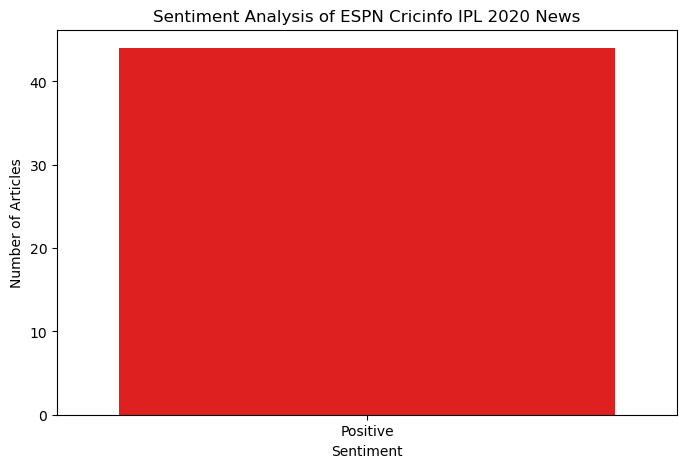

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load the sentiment results
df = pd.read_csv("ESPNCricinfo_Sentiment_Analysis.csv")

# ✅ Count the number of articles in each sentiment category
sentiment_counts = df["Sentiment"].value_counts()

# ✅ Plot the sentiment distribution
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.title("Sentiment Analysis of ESPN Cricinfo IPL 2020 News")
plt.show()

In [16]:
# ✅ Identify the most positive & negative articles
most_positive = df.loc[df["Content"].apply(lambda x: TextBlob(str(x)).sentiment.polarity).idxmax()]
most_negative = df.loc[df["Content"].apply(lambda x: TextBlob(str(x)).sentiment.polarity).idxmin()]

print("🌟 Most Positive Article:")
print(most_positive[["Title", "Sentiment"]])

print("\n🚨 Most Negative Article:")
print(most_negative[["Title", "Sentiment"]])

🌟 Most Positive Article:
Title        As It Happened: SRH vs RCB
Sentiment                      Positive
Name: 32, dtype: object

🚨 Most Negative Article:
Title        Where exactly did RCB's batting - and tactics ...
Sentiment                                             Positive
Name: 25, dtype: object


In [18]:
# ✅ Define team keywords
teams = ["Mumbai Indians", "Delhi Capitals", "RCB", "SRH", "CSK", "KKR", "RR", "KXIP"]

# ✅ Assign each article to a team
def identify_team(title):
    for team in teams:
        if team in title:
            return team
    return "Other"

df["Team"] = df["Title"].apply(identify_team)

# ✅ Group sentiment by team
team_sentiment = df.groupby(["Team", "Sentiment"]).size().unstack()

print(team_sentiment)

Sentiment       Positive
Team                    
Delhi Capitals         1
Mumbai Indians         2
Other                 33
RCB                    8


In [20]:
from textblob import TextBlob

# ✅ Print a sample of sentiment scores
df["Sentiment_Score"] = df["Content"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# ✅ Display sample scores
print(df[["Title", "Sentiment_Score"]].head(20))  # Show first 20 articles

                                                Title  Sentiment_Score
0   Vote for your favourite moment of IPL 2020\nFr...         0.277778
1   Overseas players' impact - England on top, WI ...         0.138482
2   Devdutt Padikkal: 'Virat Kohli makes your game...         0.212075
3   Mumbai Indians' dominance explained\nHow did t...         0.151809
4   The fitting end that Mumbai's brilliance deser...         0.141086
5                Started preps before others - Bumrah         0.247946
6         'Best T20 franchise in the world' - Pollard         0.185220
7   Gambhir: India's loss if Rohit isn't white-bal...         0.134933
8   Rohit: 'Said at the start we want to make winn...         0.223259
9                  As it happened: Capitals vs Mumbai         0.400000
10               Talking Points: Why did Jayant play?         0.101643
11            Report: Dominant Mumbai win fifth crown         0.146011
12              Ponting: Mumbai rose when it mattered         0.179136
13  Ca

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download("vader_lexicon")

# ✅ Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# ✅ Compute VADER sentiment score
df["Sentiment_Score"] = df["Content"].apply(lambda x: sia.polarity_scores(str(x))["compound"])

# ✅ Assign sentiment labels based on VADER scores
def categorize_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Sentiment_Score"].apply(categorize_sentiment)

# ✅ Display the updated sentiment counts
print(df["Sentiment"].value_counts())

Sentiment
Positive    37
Negative     7
Name: count, dtype: int64


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_27550/2452564834.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue", "green"])
/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_27550/2452564834.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue", "green"])


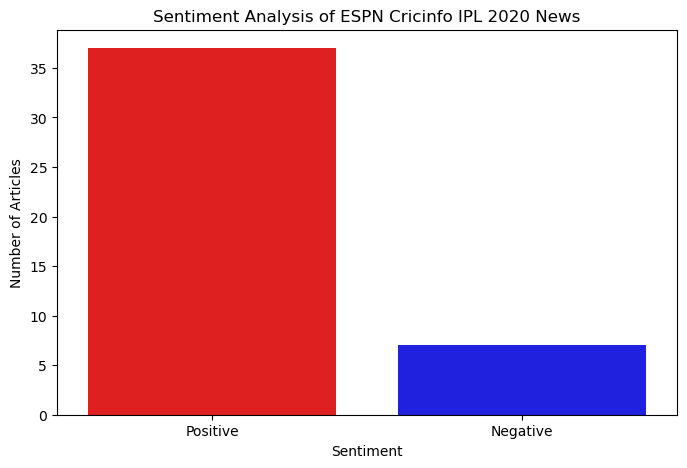

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Count Sentiments
sentiment_counts = df["Sentiment"].value_counts()

# ✅ Plot
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "blue", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.title("Sentiment Analysis of ESPN Cricinfo IPL 2020 News")
plt.show()

In [26]:
# ✅ Most Positive & Negative Articles
most_positive = df.loc[df["Sentiment_Score"].idxmax()]
most_negative = df.loc[df["Sentiment_Score"].idxmin()]

print("🌟 Most Positive Article:")
print(most_positive[["Title", "Sentiment"]])

print("\n🚨 Most Negative Article:")
print(most_negative[["Title", "Sentiment"]])

🌟 Most Positive Article:
Title        Overseas players' impact - England on top, WI ...
Sentiment                                             Positive
Name: 1, dtype: object

🚨 Most Negative Article:
Title        Why did DC hold back Nortje, Rabada?
Sentiment                                Negative
Name: 37, dtype: object


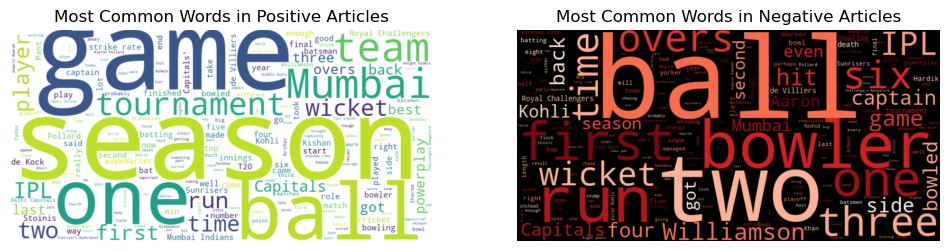

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ✅ Generate word cloud for Positive Articles
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Content'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# ✅ Generate word cloud for Negative Articles
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Content'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# 🎨 Display both word clouds
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Positive Articles")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Negative Articles")

plt.show()

In [32]:
import pandas as pd

# Load the ESPN dataset
df = pd.read_csv("ESPNCricinfo_IPL2020_News.csv")

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop any rows with missing values (if necessary)
df = df.dropna()

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

                                            Headline  \
0  60th Match • WCL 2 •  ODI •  Windhoek\nNamibia...   
1                                           Schedule   
2                                              Table   
3                                             Series   
4  Final • WPL •  WT20 •  Brabourne\nDelhi Capita...   

                                                Link  
0  https://www.espncricinfo.com/series/icc-men-s-...  
1  https://www.espncricinfo.com/series/icc-men-s-...  
2  https://www.espncricinfo.com/series/icc-men-s-...  
3  https://www.espncricinfo.com/series/icc-men-s-...  
4  https://www.espncricinfo.com/series/wpl-2024-2...  

Missing Values:
 Headline    0
Link        0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  127 non-null    object
 1   Link      127 non-null    object
dty

In [34]:
import pandas as pd

# Load the cleaned ESPN dataset
df = pd.read_csv("ESPNCricinfo_Cleaned_Articles.csv")

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop any rows with missing values (if necessary)
df = df.dropna()

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

                                               Title  \
0  Vote for your favourite moment of IPL 2020\nFr...   
1  Overseas players' impact - England on top, WI ...   
2  Devdutt Padikkal: 'Virat Kohli makes your game...   
3  Mumbai Indians' dominance explained\nHow did t...   
4  The fitting end that Mumbai's brilliance deser...   

                                                Link  \
0  https://www.espncricinfo.com/story/vote-for-yo...   
1  https://www.espncricinfo.com/story/ipl-2020-sm...   
2  https://www.espncricinfo.com/story/devdutt-pad...   
3  https://www.espncricinfo.com/story/how-the-mum...   
4  https://www.espncricinfo.com/story/dc-vs-mi-ip...   

                                             Content  
0  From fielding efforts to Super Overs to player...  
1  A look at how the overseas contingent fared in...  
2  Devdutt Padikkal, the 20-year-old Royal Challe...  
3  On May 13, 2019, the day after the Mumbai Indi...  
4  Unpopular opinion: the tightly packed points t..

In [44]:
df = pd.read_csv("ESPNCricinfo_Sentiment_Analysis.csv")
print(df.columns)  # Verify column names
df.rename(columns=lambda x: x.strip(), inplace=True)
df.rename(columns=lambda x: x.strip(), inplace=True)

Index(['Title', 'Link', 'Content', 'Sentiment'], dtype='object')


In [46]:
print(df.head())  # Check the first few rows

                                               Title  \
0  Vote for your favourite moment of IPL 2020\nFr...   
1  Overseas players' impact - England on top, WI ...   
2  Devdutt Padikkal: 'Virat Kohli makes your game...   
3  Mumbai Indians' dominance explained\nHow did t...   
4  The fitting end that Mumbai's brilliance deser...   

                                                Link  \
0  https://www.espncricinfo.com/story/vote-for-yo...   
1  https://www.espncricinfo.com/story/ipl-2020-sm...   
2  https://www.espncricinfo.com/story/devdutt-pad...   
3  https://www.espncricinfo.com/story/how-the-mum...   
4  https://www.espncricinfo.com/story/dc-vs-mi-ip...   

                                             Content Sentiment  
0  From fielding efforts to Super Overs to player...  Positive  
1  A look at how the overseas contingent fared in...  Positive  
2  Devdutt Padikkal, the 20-year-old Royal Challe...  Positive  
3  On May 13, 2019, the day after the Mumbai Indi...  Positive  
4

In [48]:
y = df["Sentiment"]  # Ensure correct column name

In [50]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure VADER is downloaded
nltk.download("vader_lexicon")

# Load the cleaned dataset
df = pd.read_csv("ESPNCricinfo_Cleaned_Articles.csv")

# Check the first few rows
print(df.head())

                                               Title  \
0  Vote for your favourite moment of IPL 2020\nFr...   
1  Overseas players' impact - England on top, WI ...   
2  Devdutt Padikkal: 'Virat Kohli makes your game...   
3  Mumbai Indians' dominance explained\nHow did t...   
4  The fitting end that Mumbai's brilliance deser...   

                                                Link  \
0  https://www.espncricinfo.com/story/vote-for-yo...   
1  https://www.espncricinfo.com/story/ipl-2020-sm...   
2  https://www.espncricinfo.com/story/devdutt-pad...   
3  https://www.espncricinfo.com/story/how-the-mum...   
4  https://www.espncricinfo.com/story/dc-vs-mi-ip...   

                                             Content  
0  From fielding efforts to Super Overs to player...  
1  A look at how the overseas contingent fared in...  
2  Devdutt Padikkal, the 20-year-old Royal Challe...  
3  On May 13, 2019, the day after the Mumbai Indi...  
4  Unpopular opinion: the tightly packed points t..

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [52]:
# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
df["Sentiment_Score"] = df["Content"].apply(lambda x: sia.polarity_scores(str(x))["compound"])

# Categorize sentiment based on scores
def categorize_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Sentiment_Score"].apply(categorize_sentiment)

# Display sentiment distribution
print(df["Sentiment"].value_counts())

Sentiment
Positive    37
Negative     7
Name: count, dtype: int64


In [54]:
df.to_csv("ESPNCricinfo_Sentiment_Analysis_VADER.csv", index=False)
print("✅ Sentiment Analysis with VADER Completed & Saved!")

✅ Sentiment Analysis with VADER Completed & Saved!


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv("ESPNCricinfo_Sentiment_Analysis_VADER.csv")

# Check for missing values
df.dropna(subset=["Content", "Sentiment"], inplace=True)

# Define feature (X) and target (y)
X = df["Content"]
y = df["Sentiment"]

# Convert labels to numerical values
y = y.map({"Positive": 1, "Negative": -1, "Neutral": 0})

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("✅ Data Preprocessing Complete!")

✅ Data Preprocessing Complete!


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Model Accuracy: 0.8888888888888888

📊 Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           1       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, "Sentiment_Model_ESPN.pkl")
joblib.dump(vectorizer, "TFIDF_Vectorizer.pkl")

print("✅ Model and Vectorizer Saved!")

✅ Model and Vectorizer Saved!


In [62]:
# ✅ Check class distribution
print(df["Sentiment"].value_counts())

Sentiment
Positive    37
Negative     7
Name: count, dtype: int64


In [64]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import numpy as np

# Define features and labels
X = df["Content"]
y = df["Sentiment"]

# Convert text data to numerical features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Define SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy="auto", random_state=42)

# Define undersampling strategy to balance majority class
undersample = RandomUnderSampler(sampling_strategy="auto", random_state=42)

# Combine oversampling and undersampling in a pipeline
resample_pipeline = Pipeline([
    ('SMOTE', smote),
    ('UNDER', undersample)
])

# Apply the resampling technique
X_resampled, y_resampled = resample_pipeline.fit_resample(X_tfidf, y)

# ✅ Check the new class distribution
from collections import Counter
print("New class distribution:", Counter(y_resampled))

New class distribution: Counter({'Negative': 37, 'Positive': 37})


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"✅ Model Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"📊 Classification Report:\n{classification_report(y_test, y_pred)}")

✅ Model Accuracy: 1.0

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        10
    Positive       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [68]:
print("Unique training labels:", set(y_train))
print("Unique testing labels:", set(y_test))

Unique training labels: {'Negative', 'Positive'}
Unique testing labels: {'Negative', 'Positive'}


In [70]:
unseen_texts = ["Mumbai Indians dominated the IPL 2020 season.",
                "The match was a disaster for RCB, they performed poorly.",
                "Delhi Capitals showed great teamwork and strategy."]

unseen_tfidf = vectorizer.transform(unseen_texts)
predictions = model.predict(unseen_tfidf)

for text, sentiment in zip(unseen_texts, predictions):
    print(f"Text: {text} → Predicted Sentiment: {sentiment}")

Text: Mumbai Indians dominated the IPL 2020 season. → Predicted Sentiment: Positive
Text: The match was a disaster for RCB, they performed poorly. → Predicted Sentiment: Positive
Text: Delhi Capitals showed great teamwork and strategy. → Predicted Sentiment: Positive


In [72]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")

Cross-validation scores: [0.86666667 1.         0.93333333 1.         1.        ]
Mean Accuracy: 0.96


In [74]:
print(set(y_train) & set(y_test))  # Should be an empty set

{'Negative', 'Positive'}


In [76]:
new_texts = ["Mumbai Indians had a fantastic season with consistent wins.",
             "RCB struggled throughout and performed poorly.",
             "Delhi Capitals showed great potential but fell short in the final."]

new_tfidf = vectorizer.transform(new_texts)
predictions = model.predict(new_tfidf)

for text, sentiment in zip(new_texts, predictions):
    print(f"Text: {text} → Predicted Sentiment: {sentiment}")

Text: Mumbai Indians had a fantastic season with consistent wins. → Predicted Sentiment: Positive
Text: RCB struggled throughout and performed poorly. → Predicted Sentiment: Positive
Text: Delhi Capitals showed great potential but fell short in the final. → Predicted Sentiment: Positive


In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Random Forest Accuracy: 1.0


In [80]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Random Forest Accuracy: 1.0


In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

In [84]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

In [86]:
from sklearn.svm import SVC
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")

SVM Accuracy: 1.0


In [88]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}")

Naive Bayes Accuracy: 1.0


In [90]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))  # Uses unigrams & bigrams

In [92]:
print(df["Sentiment"].value_counts())

Sentiment
Positive    37
Negative     7
Name: count, dtype: int64


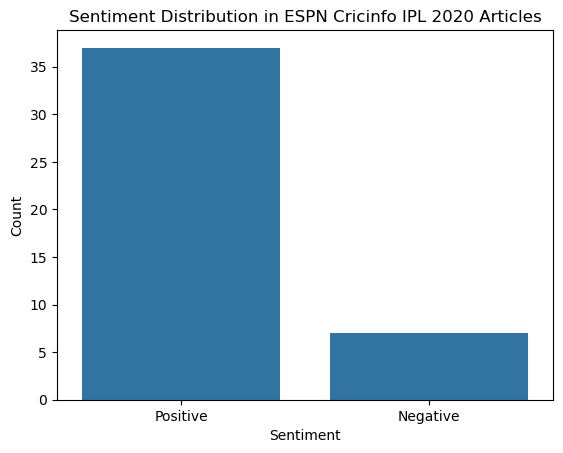

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df["Sentiment"])
plt.title("Sentiment Distribution in ESPN Cricinfo IPL 2020 Articles")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [96]:
df[["Title", "Content", "Sentiment", "Sentiment_Score"]].sort_values(by="Sentiment_Score", ascending=True).head(10)  # Negative articles
df[["Title", "Content", "Sentiment", "Sentiment_Score"]].sort_values(by="Sentiment_Score", ascending=False).head(10)  # Positive articles

,Title,Content,Sentiment,Sentiment_Score
3,Mumbai Indians' dominance explained\nHow did t...,"On May 13, 2019, the day after the Mumbai Indi...",Positive,0.9998
1,"Overseas players' impact - England on top, WI ...",A look at how the overseas contingent fared in...,Positive,0.9998
2,Devdutt Padikkal: 'Virat Kohli makes your game...,"Devdutt Padikkal, the 20-year-old Royal Challe...",Positive,0.9995
5,Started preps before others - Bumrah,Here's what the Mumbai Indians players said af...,Positive,0.9988
17,Warner: 'Can't win tournaments if you keep dro...,"The Sunrisers Hyderabad captain, David Warner,...",Positive,0.9979
35,Sharma on what makes MI 'different',"The Mumbai Indians captain, Rohit Sharma, sugg...",Positive,0.9971
4,The fitting end that Mumbai's brilliance deser...,Unpopular opinion: the tightly packed points t...,Positive,0.9970
22,Sunrisers boosted by team effort in injury-aff...,Where did they finish? After just three wins i...,Positive,0.9969
15,Team review: Sunrisers Hyderabad boosted by te...,Where did they finish? After just three wins i...,Positive,0.9969
12,Ponting: Mumbai rose when it mattered,On Monday Ricky Ponting had said that if there...,Positive,0.9968


In [98]:
def correct_sentiment(score):
    if score > 0.2:
        return "Positive"
    elif score < -0.2:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Sentiment_Score"].apply(correct_sentiment)

In [100]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, df["Sentiment"])

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 🔹 Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df["Content"])
y = df["Sentiment"]

# 🔹 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 🔹 Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", random_state=42),
    "Naive Bayes": MultinomialNB()
}

# 🔹 Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n📌 Model: {name}")
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))


📌 Model: Logistic Regression
✅ Accuracy: 0.89
📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9


📌 Model: Random Forest
✅ Accuracy: 0.89
📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9


📌 Model: SVM
✅ Accuracy: 0.89
📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.89      1.00      0.94

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-pa

In [104]:
# ✅ Unseen Test Cases
new_texts = [
    "Mumbai Indians had a fantastic season with consistent wins.",
    "RCB struggled throughout and performed poorly.",
    "Delhi Capitals showed great potential but fell short in the final."
]

new_tfidf = vectorizer.transform(new_texts)

for name, model in models.items():
    predictions = model.predict(new_tfidf)
    print(f"\n📌 Model: {name}")
    for text, sentiment in zip(new_texts, predictions):
        print(f"Text: {text} → Predicted Sentiment: {sentiment}")


📌 Model: Logistic Regression
Text: Mumbai Indians had a fantastic season with consistent wins. → Predicted Sentiment: Positive
Text: RCB struggled throughout and performed poorly. → Predicted Sentiment: Positive
Text: Delhi Capitals showed great potential but fell short in the final. → Predicted Sentiment: Positive

📌 Model: Random Forest
Text: Mumbai Indians had a fantastic season with consistent wins. → Predicted Sentiment: Positive
Text: RCB struggled throughout and performed poorly. → Predicted Sentiment: Positive
Text: Delhi Capitals showed great potential but fell short in the final. → Predicted Sentiment: Positive

📌 Model: SVM
Text: Mumbai Indians had a fantastic season with consistent wins. → Predicted Sentiment: Positive
Text: RCB struggled throughout and performed poorly. → Predicted Sentiment: Positive
Text: Delhi Capitals showed great potential but fell short in the final. → Predicted Sentiment: Positive

📌 Model: Naive Bayes
Text: Mumbai Indians had a fantastic season wi

In [106]:
import joblib

best_model = models["Logistic Regression"]  # Change if another model performs better
joblib.dump(best_model, "Final_Sentiment_Model.pkl")
joblib.dump(vectorizer, "Final_TFIDF_Vectorizer.pkl")

print("✅ Final Model & Vectorizer Saved!")

✅ Final Model & Vectorizer Saved!
